# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

from pprint import pprint

# Import API key
from api_keys import api_key
#print(api_key)

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

# lats = np.random.uniform(low=-90.000, high=90.000, size=150)
# lngs = np.random.uniform(low=-180.000, high=180.000, size=150)

lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


591

In [ ]:
#print(cities)


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Create an empty list to store the responses

base_url = "http://api.openweathermap.org/data/2.5/weather"

units = "imperial"

query_url = f'{base_url}?appid={api_key}&units={units}&q='

print(query_url)


http://api.openweathermap.org/data/2.5/weather?appid=f7108597839db7475a2c37928f58ffe3&units=imperial&q=


In [5]:
# create response lists
cityName = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lon = []
maxTemp = []
windSpeed = []

# variables for enumeration
recordCount = 1
setCount = 1


# Make a request 
print(f"Beginning Data Retrieval")
print('-------------------------------------------')

for i, city in enumerate(cities):
    #print(i,city)
    
    if (i % 100 == 0 and i >= 100):
        recordCount = 1
        setCount = setCount + 1
    
    print(f'Processing Record {recordCount} of Set {setCount} | {city}')
    
    recordCount = recordCount + 1
    
    # Get one of the posts
   
    try:
         
        response = requests.get(query_url + city).json()
        #pprint(response)

        # Save post's JSON
        cityName.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        maxTemp.append(response['main']['temp_max'])
        windSpeed.append(response['wind']['speed'])
          
             
    except KeyError:
        #print('City not found.  Skipping...')
        
        print('City not found.  Skipping city ...'+ city)
        
       

Beginning Data Retrieval
-------------------------------------------
Processing Record 1 of Set 1 | cidreira
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | koungou
City not found.  Skipping city ...koungou
Processing Record 6 of Set 1 | hihifo
City not found.  Skipping city ...hihifo
Processing Record 7 of Set 1 | xushan
Processing Record 8 of Set 1 | dalnegorsk
Processing Record 9 of Set 1 | soure
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | dwarka
Processing Record 13 of Set 1 | freeport
Processing Record 14 of Set 1 | qorveh
Processing Record 15 of Set 1 | carnot
Processing Record 16 of Set 1 | ponta do sol
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | hilo
Processing Record 19 of Set 1 | leningradskiy
Processing Record 20 of Set 1 | arraial do cabo
Processing Record 21 of Set 1 | punta arena

Processing Record 78 of Set 2 | la sarre
Processing Record 79 of Set 2 | uribia
Processing Record 80 of Set 2 | farafangana
Processing Record 81 of Set 2 | baruun-urt
Processing Record 82 of Set 2 | luderitz
Processing Record 83 of Set 2 | ketchikan
Processing Record 84 of Set 2 | flinders
Processing Record 85 of Set 2 | vardo
Processing Record 86 of Set 2 | linaon
Processing Record 87 of Set 2 | hofn
Processing Record 88 of Set 2 | ugoofaaru
Processing Record 89 of Set 2 | roros
Processing Record 90 of Set 2 | severo-yeniseyskiy
Processing Record 91 of Set 2 | chipinge
Processing Record 92 of Set 2 | sadovo
Processing Record 93 of Set 2 | tautira
Processing Record 94 of Set 2 | orchard homes
Processing Record 95 of Set 2 | keetmanshoop
Processing Record 96 of Set 2 | lithgow
Processing Record 97 of Set 2 | alugan
Processing Record 98 of Set 2 | kroya
Processing Record 99 of Set 2 | beloha
Processing Record 100 of Set 2 | khatanga
Processing Record 1 of Set 3 | pevek
Processing Record 

Processing Record 56 of Set 4 | vagur
Processing Record 57 of Set 4 | codrington
Processing Record 58 of Set 4 | provideniya
Processing Record 59 of Set 4 | wajir
Processing Record 60 of Set 4 | pathalgaon
Processing Record 61 of Set 4 | monywa
Processing Record 62 of Set 4 | tasbuget
City not found.  Skipping city ...tasbuget
Processing Record 63 of Set 4 | arlit
Processing Record 64 of Set 4 | mehamn
Processing Record 65 of Set 4 | kuusamo
Processing Record 66 of Set 4 | hohhot
Processing Record 67 of Set 4 | hasaki
Processing Record 68 of Set 4 | beringovskiy
Processing Record 69 of Set 4 | nanortalik
Processing Record 70 of Set 4 | forbes
Processing Record 71 of Set 4 | lompoc
Processing Record 72 of Set 4 | kushiro
Processing Record 73 of Set 4 | sokolo
Processing Record 74 of Set 4 | collie
Processing Record 75 of Set 4 | fare
Processing Record 76 of Set 4 | jhang
Processing Record 77 of Set 4 | camoapa
Processing Record 78 of Set 4 | raudeberg
Processing Record 79 of Set 4 | tsi

Processing Record 37 of Set 6 | san jose
Processing Record 38 of Set 6 | ruteng
Processing Record 39 of Set 6 | sao jose da coroa grande
Processing Record 40 of Set 6 | chagda
City not found.  Skipping city ...chagda
Processing Record 41 of Set 6 | cockburn harbour
City not found.  Skipping city ...cockburn harbour
Processing Record 42 of Set 6 | camacupa
Processing Record 43 of Set 6 | mayya
Processing Record 44 of Set 6 | labuhan
Processing Record 45 of Set 6 | el sauzal
Processing Record 46 of Set 6 | guicheng
City not found.  Skipping city ...guicheng
Processing Record 47 of Set 6 | hami
Processing Record 48 of Set 6 | mackay
Processing Record 49 of Set 6 | yokadouma
Processing Record 50 of Set 6 | aflu
City not found.  Skipping city ...aflu
Processing Record 51 of Set 6 | chingirlau
Processing Record 52 of Set 6 | monchegorsk
Processing Record 53 of Set 6 | lazaro cardenas
Processing Record 54 of Set 6 | orotukan
Processing Record 55 of Set 6 | charters towers
Processing Record 56

In [6]:
print(len(cityName))
print(len(cloudiness))
print(len(country))
print(len(date))
print(len(humidity))
print(len(lat))
print(len(lon))
print(len(maxTemp))
print(len(windSpeed))


523
523
523
523
523
523
523
523
523


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
weather_dict = {
    'City': cityName,
    'Cloudiness': cloudiness,
    'Country': country,
    'Date': date,
    'Humidity': humidity,
    'Latitude': lat,
    'Longitude': lon,
    'Max Temp': maxTemp,
    'Wind Speed': windSpeed
       }

#print (weather_dict)


In [9]:
weatherData = pd.DataFrame(weather_dict)
weatherData.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,Cidreira,92,BR,1554498008,96,-30.17,-50.22,68.05,13.35
1,Busselton,0,AU,1554497888,54,-33.64,115.35,46.99,8.10
2,Kapaa,20,US,1554497898,61,22.08,-159.32,78.80,6.93
3,Albany,90,US,1554498009,80,42.65,-73.75,37.00,11.41
4,Xushan,0,CN,1554497914,87,30.18,121.25,60.01,2.24


In [12]:
weatherData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 9 columns):
City          523 non-null object
Cloudiness    523 non-null int64
Country       523 non-null object
Date          523 non-null int64
Humidity      523 non-null int64
Latitude      523 non-null float64
Longitude     523 non-null float64
Max Temp      523 non-null float64
Wind Speed    523 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 36.9+ KB


In [13]:
# export to csv file
weatherData.to_csv('./output_data_file/cities.csv')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

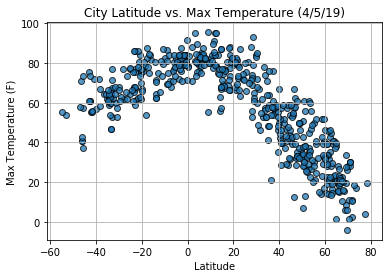

In [14]:
x = weatherData['Latitude']
y = weatherData['Max Temp']

plt.scatter(x, y, marker='o', edgecolors='black', alpha=0.75)


# graph properties
plt.title("City Latitude vs. Max Temperature (4/5/19)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid()



# Save Figure
plt.savefig("./images/lat_vs_maxTemp_plot.png")

#### Latitude vs. Humidity Plot

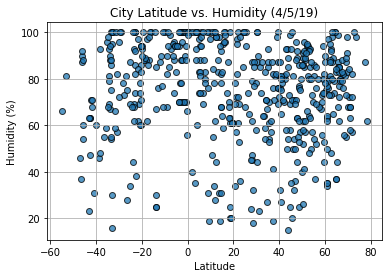

In [15]:
x = weatherData['Latitude']
y = weatherData['Humidity']

plt.scatter(x, y, marker='o', edgecolors='black', alpha=0.75)


# graph properties
plt.title("City Latitude vs. Humidity (4/5/19)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()



# Save Figure
plt.savefig("./images/lat_vs_humidity_plot.png")

#### Latitude vs. Cloudiness Plot

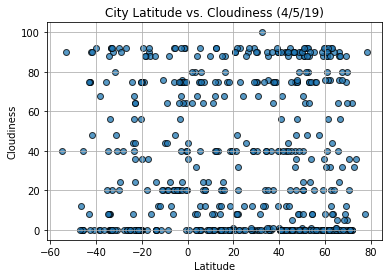

In [17]:
x = weatherData['Latitude']
y = weatherData['Cloudiness']

plt.scatter(x, y, marker='o', edgecolors='black', alpha=0.75)


# graph properties
plt.title("City Latitude vs. Cloudiness (4/5/19)")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid()



# Save Figure
plt.savefig("./images/lat_vs_cloudiness_plot.png")

#### Latitude vs. Wind Speed Plot

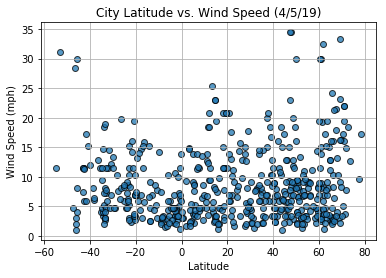

In [18]:
x = weatherData['Latitude']
y = weatherData['Wind Speed']

plt.scatter(x, y, marker='o', edgecolors='black', alpha=0.75)


# graph properties
plt.title("City Latitude vs. Wind Speed (4/5/19)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()



# Save Figure
plt.savefig("./images/lat_vs_windSpeed_plot.png")